In [3]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv("mobile_data.csv")

In [5]:
df.shape

(836, 10)

In [6]:
# Drop the Unwannted column the first one
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
# After removing the dataset look like
df.head()

,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,"LG V30+ (Black, 128 )",4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,I Kall K11,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,Nokia 105 ss,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,"Samsung Galaxy A50 (White, 64 )",4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,"POCO F1 (Steel Blue, 128 )",4.5,6.0,128.0,6.18,35,15.0,3800,18999


In [8]:
df['Brand me'].value_counts()

Kechaoda A27                                11
Jivi R21Plus                                 8
Easyfone Star                                8
Lava 34                                      8
MTR Ferrari                                  7
                                            ..
Samsung Galaxy A80 (Phantom Black, 128 )     1
Lava H1 Hero 600                             1
Honor 9N (Midnight Black, 64 )               1
Micax X773                                   1
MTR BA                                       1
Name: Brand me, Length: 427, dtype: int64

In [9]:
df.duplicated().sum()

206

In [10]:
# Dropping the Name columns
df.drop(['Brand me'],axis=1,inplace=True)

In [11]:
df.head()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4.5,6.0,128.0,6.18,35,15.0,3800,18999


In [12]:
df.isnull().sum()

Ratings           31
RAM                7
ROM                4
Mobile_Size        2
Primary_Cam        0
Selfi_Cam        269
Battery_Power      0
Price              0
dtype: int64

<Axes: >

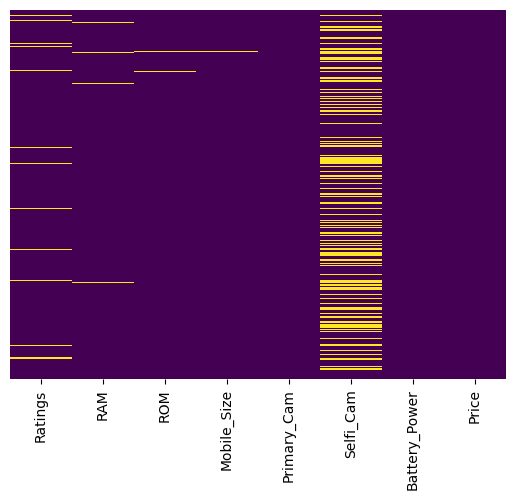

In [13]:
# Seeing the null values using heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
# Fill up the mean values of all the missing value columns into the dataset
df['Ratings'] = df['Ratings'].fillna(df['Ratings'].mean())
df['RAM'] = df['RAM'].fillna(df['RAM'].mean())
df['ROM'] = df['ROM'].fillna(df['ROM'].mean())
df['Mobile_Size'] = df['Mobile_Size'].fillna(df['Mobile_Size'].mean())
df['Selfi_Cam'] = df['Selfi_Cam'].fillna(df['Selfi_Cam'].mean())

In [15]:
# After handling the all of the missing and null values from the dataset
df.isnull().sum()

Ratings          0
RAM              0
ROM              0
Mobile_Size      0
Primary_Cam      0
Selfi_Cam        0
Battery_Power    0
Price            0
dtype: int64

<Axes: >

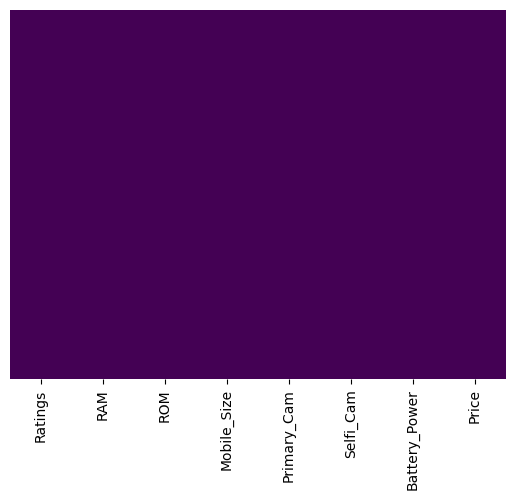

In [16]:
# We can able to see the there is no null values  
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
# Changing the Datatype
df['RAM'] = df['RAM'].astype('int64')
df['ROM'] = df['ROM'].astype('int64')
df['Selfi_Cam'] = df['Selfi_Cam'].astype('int64')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ratings        836 non-null    float64
 1   RAM            836 non-null    int64  
 2   ROM            836 non-null    int64  
 3   Mobile_Size    836 non-null    float64
 4   Primary_Cam    836 non-null    int64  
 5   Selfi_Cam      836 non-null    int64  
 6   Battery_Power  836 non-null    int64  
 7   Price          836 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 52.4 KB


## EDA

In [19]:
# Finding out the correlation between the features
corr = df.corr()
corr.shape

(8, 8)

<Axes: >

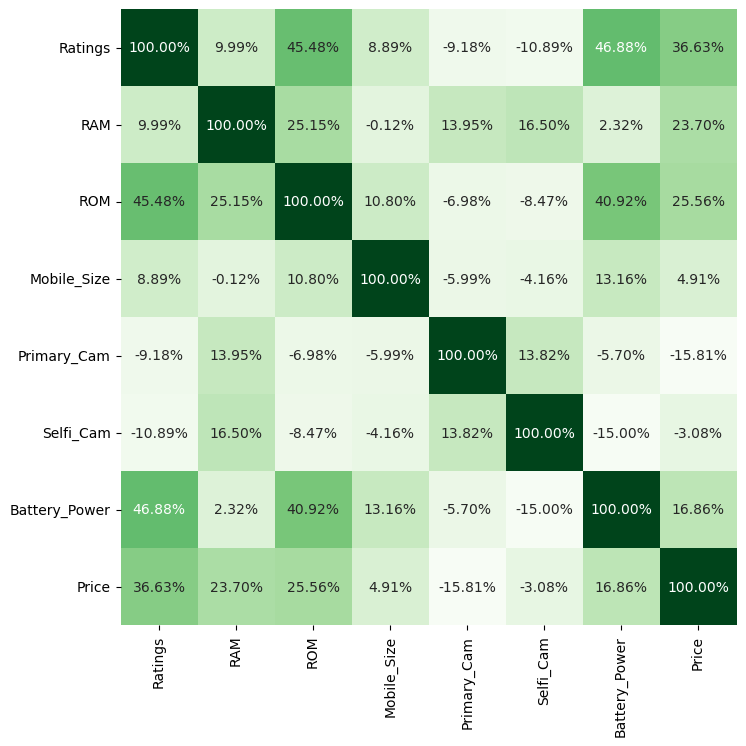

In [20]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar=False, square= True, fmt='.2%', annot=True, cmap='Greens')

<Axes: xlabel='Ratings', ylabel='count'>

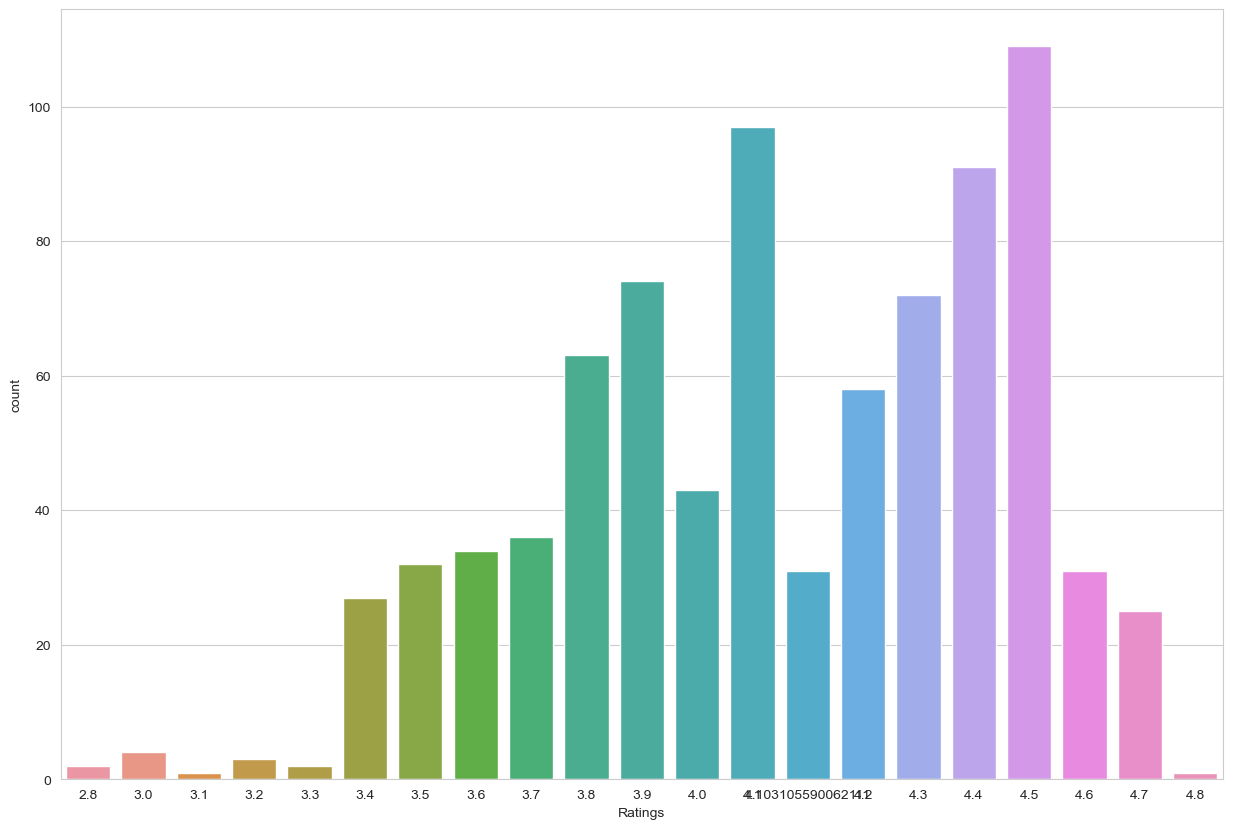

In [21]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='Ratings',data=df)

<Axes: xlabel='ROM', ylabel='count'>

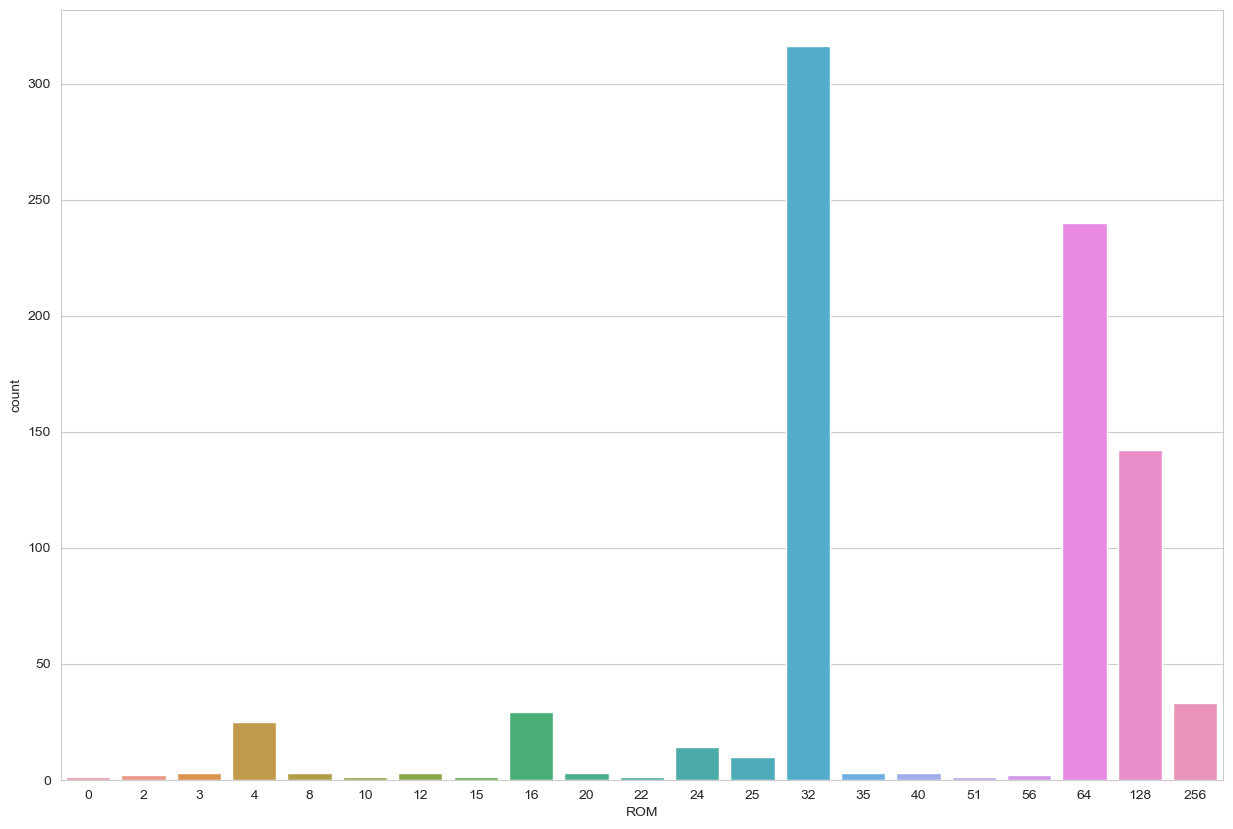

In [22]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='ROM',data=df)

<Axes: xlabel='Primary_Cam', ylabel='count'>

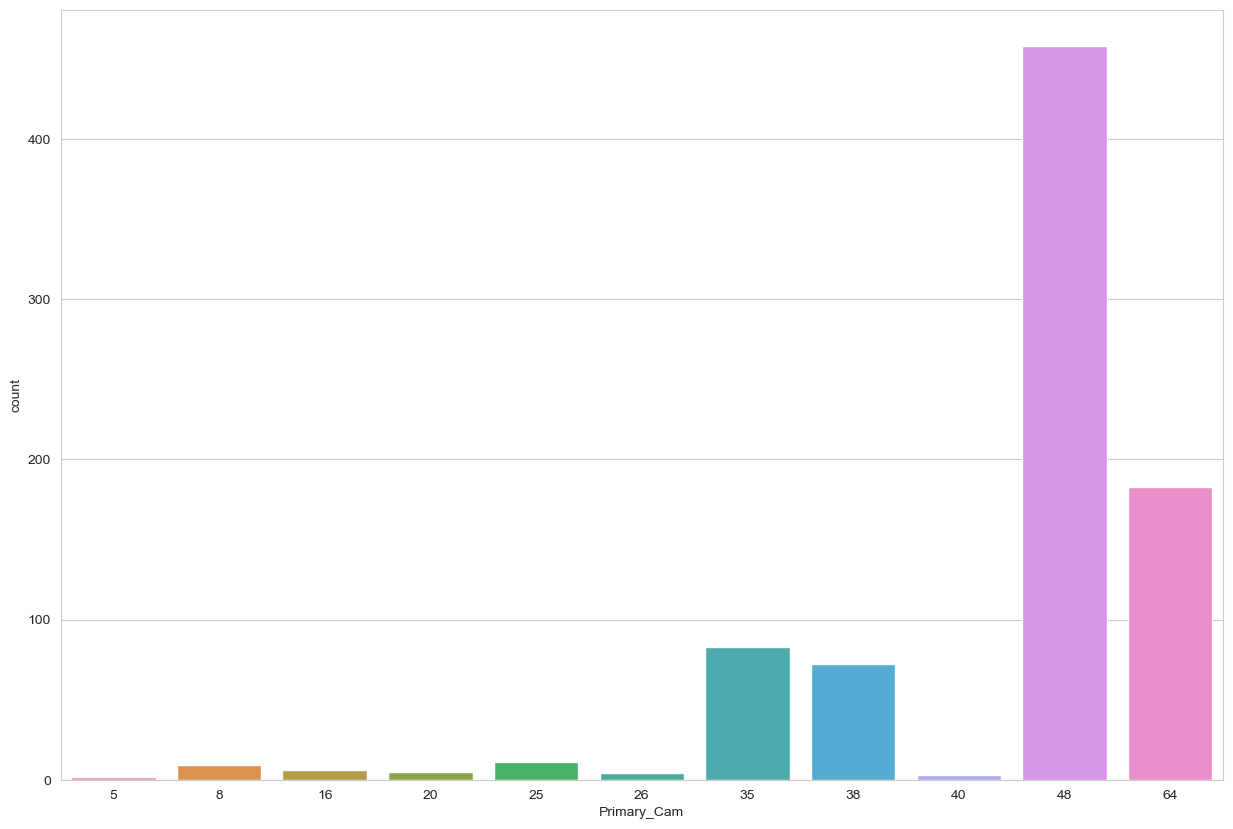

In [23]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='Primary_Cam',data=df)

<Axes: xlabel='Selfi_Cam', ylabel='count'>

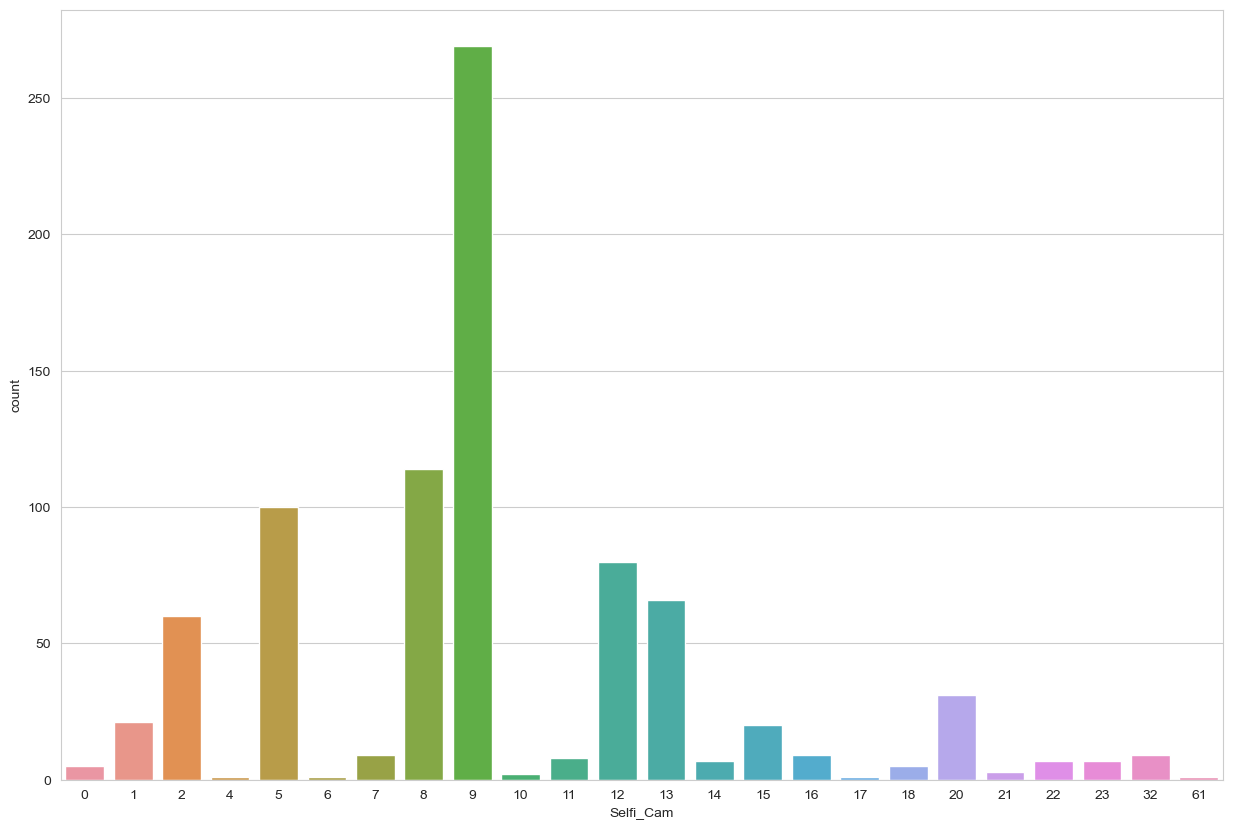

In [24]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='Selfi_Cam',data=df)

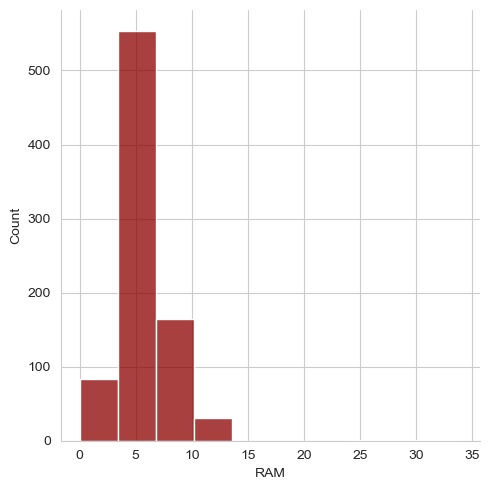

In [25]:
sns.displot(df['RAM'].dropna(),kde=False,color='darkred',bins=10)

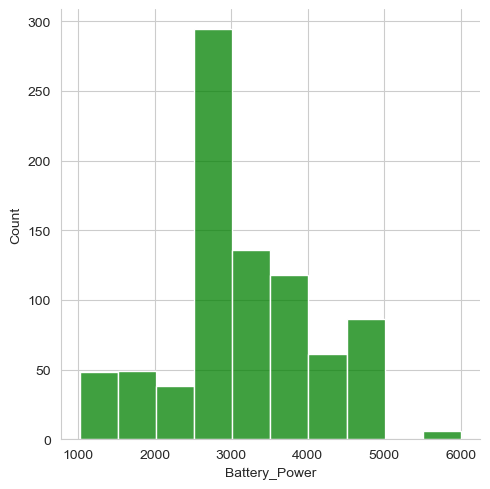

In [26]:
sns.displot(df['Battery_Power'].dropna(),kde=False,color='green',bins=10)

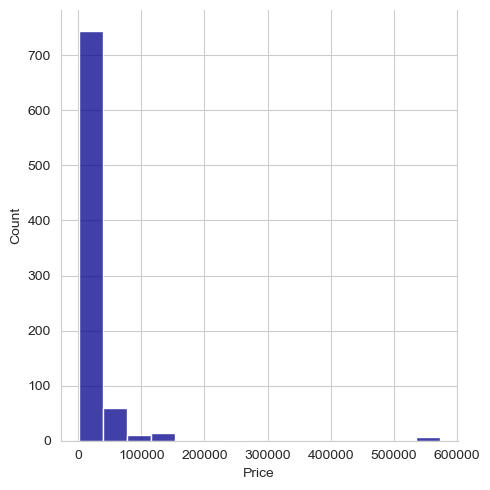

In [27]:
sns.displot(df['Price'].dropna(),kde=False,color='darkblue',bins=15)

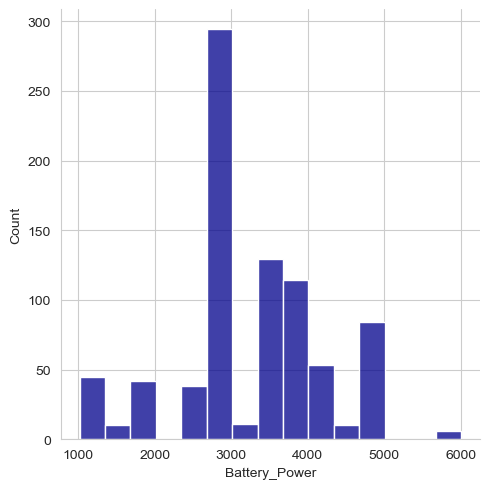

In [28]:
sns.displot(df['Battery_Power'].dropna(),kde=False,color='darkblue',bins=15)

<Figure size 1000x1000 with 0 Axes>

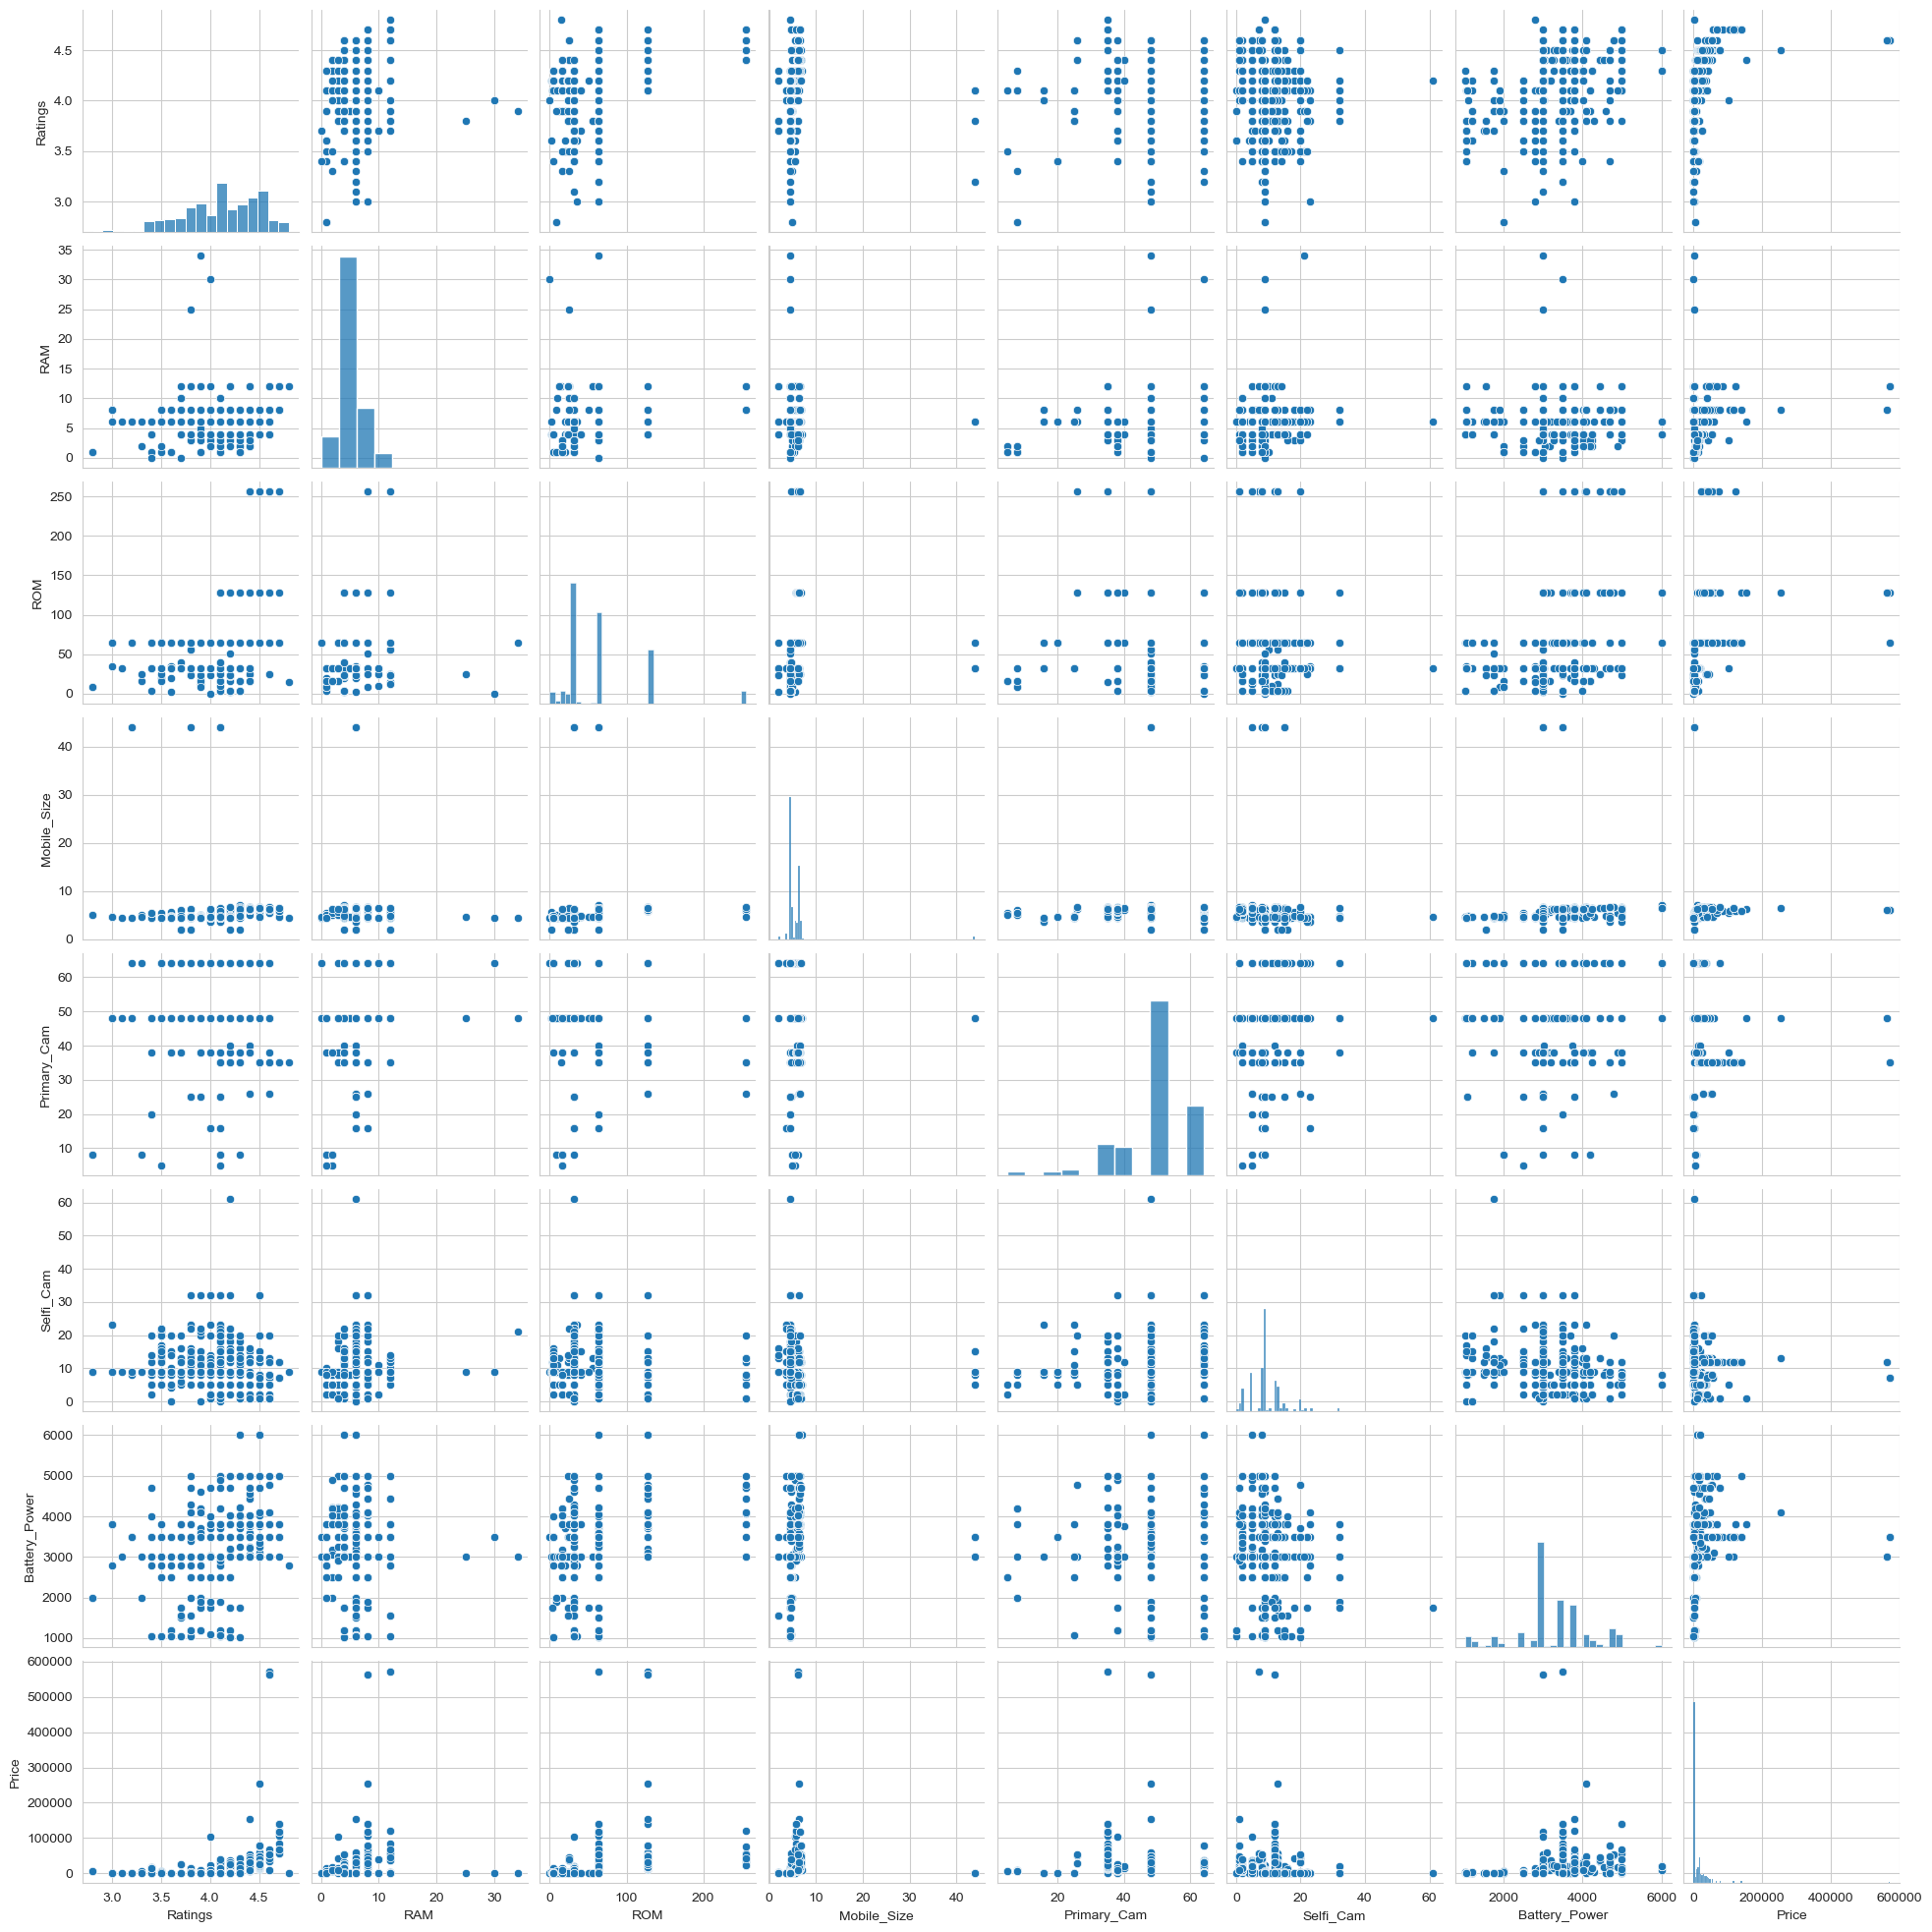

In [29]:
plt.figure(figsize=(10,10))
sns.pairplot(data=df)

## Feature Selection


In [30]:
# Lets try to understand which are important feature for this dataset
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [31]:
X = df.iloc[:,1:7]  # Independent columns
y = df.iloc[:,[-1]] # Target column i.e price range 

In [32]:
# Apply SelectKBest class to extract top 4 best features
bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X,y)

In [33]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [34]:
# Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [35]:
featureScores

,Specs,Score
0,RAM,605.009453
1,ROM,31222.209834
2,Mobile_Size,874.471349
3,Primary_Cam,1465.379223
4,Selfi_Cam,1358.898574
5,Battery_Power,156629.116310


In [36]:
print(featureScores.nlargest(4,'Score'))  #print 4 best features

           Specs          Score
5  Battery_Power  156629.116310
1            ROM   31222.209834
3    Primary_Cam    1465.379223
4      Selfi_Cam    1358.898574


## Feature Importance

In [37]:
# Fiting Feature Seclection using Ensemble Methods
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

/var/folders/rd/lb4fmzhx71gdw95pmpj7xqm40000gn/T/ipykernel_56748/45490098.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,y)


ExtraTreesClassifier()

In [38]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.11648795 0.103878   0.26592018 0.08853796 0.22412003 0.20105588]


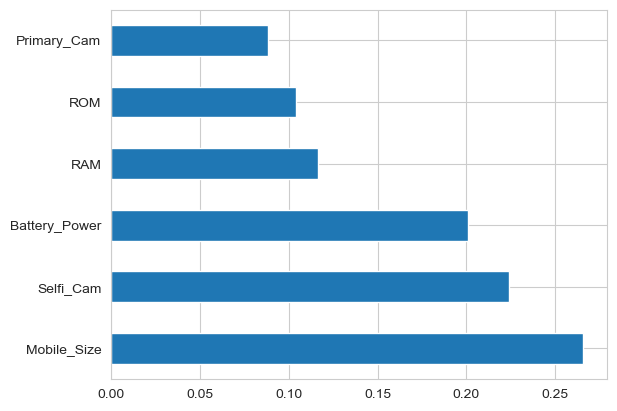

In [39]:
# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [40]:
df.head()


,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4,128,6.00,48,13,4000,24999
1,3.4,6,64,4.50,48,12,4000,15999
2,4.3,4,4,4.50,64,16,4000,15000
3,4.4,6,64,6.40,48,15,3800,18999
4,4.5,6,128,6.18,35,15,3800,18999


In [41]:
df.head()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4,128,6.00,48,13,4000,24999
1,3.4,6,64,4.50,48,12,4000,15999
2,4.3,4,4,4.50,64,16,4000,15000
3,4.4,6,64,6.40,48,15,3800,18999
4,4.5,6,128,6.18,35,15,3800,18999


## Model Fitting
### Random Forest Regressor

In [42]:
# Value Assigning
X= df.drop(columns=['Price'])
y=np.log(df['Price'])

In [43]:
from sklearn.model_selection import train_test_split,
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [44]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)
reg.fit(X_train,y_train)

RandomForestRegressor(max_depth=15, max_features=0.75, max_samples=0.5,
                      random_state=3)

In [48]:
from sklearn.metrics import r2_score,mean_absolute_error
y_pred = reg.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9405584179093146
MAE 0.18217173237590614


In [49]:
# Training Score
print("Training Accuracy:",reg.score(X_train,y_train)*100)

Training Accuracy: 97.80677435857224


In [50]:
# Testing Score
print("Testing Accuracy:",reg.score(X_test,y_test)*100)

Testing Accuracy: 94.05584179093147


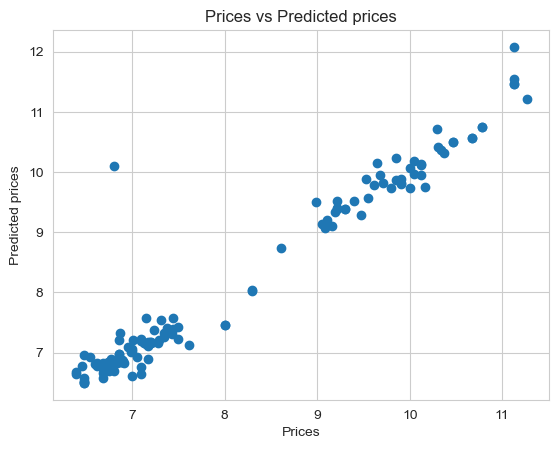

In [51]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

## Support Vector Regressor

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [53]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

SVR()

In [54]:
y_pred = reg.predict(X_train)

In [55]:
# Training Score
print("Training Accuracy:",reg.score(X_train,y_train)*100)

Training Accuracy: 97.32298292769023


In [56]:
# Testing Score
print("Testing Accuracy:",reg.score(X_test,y_test)*100)

Testing Accuracy: 97.42001280036992


## Random Forest Regressor
### Training Accuracy : 97.8
### Testing Accuracy : 94

## Support Vector Regressor
### Training Accuracy : 97.3
### Testing Accuracy : 97.4

## Exporting Model

In [57]:
import pickle
pickle.dump(df,open('df_mobile.pkl','wb'))
pickle.dump(reg,open('reg.pkl','wb'))